<a href="https://colab.research.google.com/github/Nurudeen2020/Python-for-Machine-Learning/blob/main/Insurance_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
insurance_data= pd.read_csv("https://github.com/dphi-official/Datasets/blob/master/travel_insurance/Training_set_label.csv?raw=true")
insurance_data

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0
...,...,...,...,...,...,...,...,...,...,...,...
48255,EPX,Travel Agency,Online,2 way Comprehensive Plan,39,CHINA,44.0,0.00,NaN,36,0
48256,C2B,Airlines,Online,Bronze Plan,20,SINGAPORE,60.0,15.00,F,30,0
48257,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,19,AUSTRALIA,29.7,17.82,NaN,43,0
48258,EPX,Travel Agency,Online,2 way Comprehensive Plan,7,INDONESIA,20.0,0.00,NaN,61,0


**Prediction**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
insurance_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Training_set_label.csv" )
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [ ]:
insurance_data.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

In [ ]:
insurance_data['Gender'].value_counts()

M    7137
F    6762
Name: Gender, dtype: int64

In [ ]:
del insurance_data['Gender']

In [ ]:
insurance_data.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,23,0
5,EPX,Travel Agency,Online,2 way Comprehensive Plan,36,"KOREA, REPUBLIC OF",47.0,0.00,36,0
6,EPX,Travel Agency,Online,2 way Comprehensive Plan,13,THAILAND,25.0,0.00,36,0
7,EPX,Travel Agency,Online,Cancellation Plan,4,VIET NAM,27.0,0.00,35,0
8,EPX,Travel Agency,Online,2 way Comprehensive Plan,95,THAILAND,20.0,0.00,36,0
9,EPX,Travel Agency,Online,Cancellation Plan,30,AUSTRALIA,10.0,0.00,36,0


In [ ]:
insurance_data['Claim'].value_counts()

0    47552
1      708
Name: Claim, dtype: int64

In [ ]:
from sklearn import model_selection



In [ ]:
insurance_data.corr()

,Duration,Net Sales,Commision (in value),Age,Claim
Duration,1.000000,0.416221,0.334920,0.002555,0.073068
Net Sales,0.416221,1.000000,0.651033,0.034262,0.137079
Commision (in value),0.334920,0.651033,1.000000,0.118530,0.098935
Age,0.002555,0.034262,0.118530,1.000000,-0.010401
Claim,0.073068,0.137079,0.098935,-0.010401,1.000000


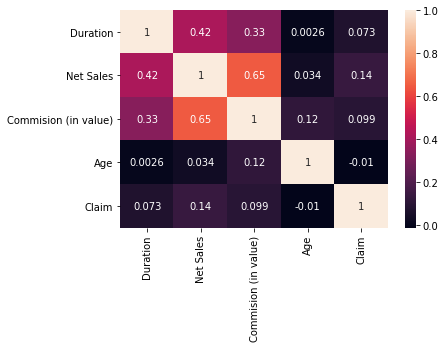

In [ ]:
sns.heatmap(insurance_data.corr(), annot=True)

In [ ]:
insurance_data.corr()['Claim'].sort_values(ascending=False)

Claim                   1.000000
Net Sales               0.137079
Commision (in value)    0.098935
Duration                0.073068
Age                    -0.010401
Name: Claim, dtype: float64

In [ ]:
#Split the data into Feature and Label
X= insurance_data[['Net Sales', 'Commision (in value)', 'Duration', 'Age']]
y= insurance_data['Claim']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#This is an example of a classification problems because the insurance buyrer claim is categorical and hence decisoin tree will be used
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT= DecisionTreeClassifier()

In [ ]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions= DT.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test.head()

38943    1
27277    0
26868    0
13744    0
26029    0
Name: Claim, dtype: int64

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9521
           1       0.04      0.05      0.04       131

    accuracy                           0.97      9652
   macro avg       0.52      0.52      0.52      9652
weighted avg       0.97      0.97      0.97      9652



In [ ]:
print(confusion_matrix(y_test, predictions))

[[9390  131]
 [ 125    6]]


In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = X_test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>